In [51]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from plotting import *

In [82]:
# Dataset for Classification
np.random.seed(42)
dataset = load_iris()
x = dataset.data[:, 0:2]
y = dataset.target

idx = np.random.permutation(len(x))[:150]
x = x[idx]
y = y[idx]

print("Samples: ", len(x))

Samples:  150


In [83]:
df = pd.DataFrame(x, columns=dataset.feature_names[:2])
df.head()

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8


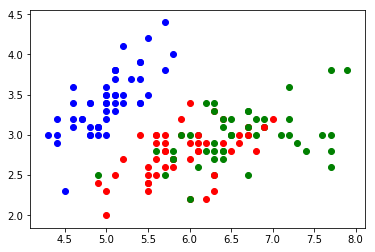

In [84]:
colors = ["blue", "red", "green"]
for i, p in enumerate(x):
    plt.scatter(p[0], p[1], color=colors[y[i]])
plt.show()

In [87]:
class kMeans:
    def __init__(self, n_cluster=3, max_iter=100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.assignment = {i: [] for i in range(self.n_cluster)}
        
    def fit(self, x):
        idx = np.random.permutation(len(x))[:self.n_cluster]
        self.centroids = x[idx]
        self.start_centroids = self.centroids.copy()
        # Start training
        for it in range(self.max_iter):
            self.assignment = {i: [] for i in range(self.n_cluster)}
            # Step 1: Assignment
            for point in x:
                distance_centroids = [np.linalg.norm(point - centroid) for centroid in self.centroids]
                nearest_centroid = np.argmin(distance_centroids, axis=0)
                self.assignment[nearest_centroid].append([point[0], point[1]])
            # Step 2: Update step
            for i in range(self.n_cluster):
                if len(self.assignment[i]) > 0:
                    self.centroids[i] = np.mean(self.assignment[i], axis=0)
        return self.centroids, self.start_centroids
           
    def predict(self, x):
        y = np.array([0 for _ in range(x.shape[0])])
        for i, x_p in enumerate(x):
            distances = np.array([np.linalg.norm(centroids[i] - x_p) for i in range(self.n_cluster)])
            cluster = np.argmin(distances)
            y[i] = cluster
        return y

In [88]:
kmeans = kMeans(n_cluster=3, max_iter=100)
centroids, start_centroids = kmeans.fit(x)
y_pred = kmeans.predict(x)

print(centroids)

[[6.82391304 3.07826087]
 [5.00392157 3.4       ]
 [5.8        2.7       ]]


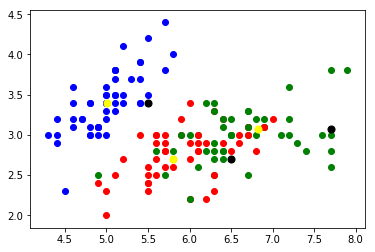

In [89]:
colors = ["blue", "red", "green"]
for i, p in enumerate(x):
    plt.scatter(p[0], p[1], color=colors[y[i]])
plt.scatter(centroids[:,0], centroids[:,1], color="yellow", s=50)
plt.scatter(start_centroids[:,0], centroids[:,1], color="black", s=50)
plt.show()

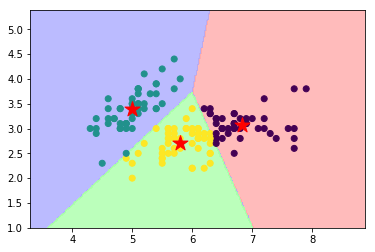

In [90]:
plot(x, y, y_pred, centroids, kmeans)